#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

#2. Korean Characters

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. 집계시

In [7]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [8]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [9]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [10]:
data_06_22_counting

13    7092
14    7091
12    7089
15    7078
11    7059
10    7038
16    7011
9     7008
17    6919
8     6849
18    6742
19    6627
7     6614
20    6518
21    6284
22    6130
6     6095
Name: 집계시, dtype: int64

In [11]:
# Store index of data_06_22_counting into x
x = data_06_22_counting.index

In [12]:
labels = [str(i)+'시' for i in x]

In [13]:
labels

['13시',
 '14시',
 '12시',
 '15시',
 '11시',
 '10시',
 '16시',
 '9시',
 '17시',
 '8시',
 '18시',
 '19시',
 '7시',
 '20시',
 '21시',
 '22시',
 '6시']

In [14]:
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
# Store values of data_06_22_counting into values
values = data_06_22_counting.values

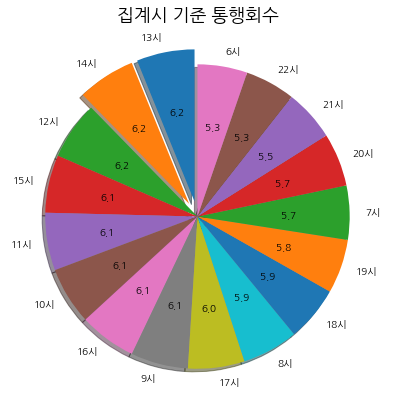

In [16]:
# Configure figure size
plt.figure(figsize=(7,7))
# Creae pie Chart
plt.pie(values, explode=explode, labels=labels, startangle = 90, shadow=True, autopct='%.1f')
# Generate labels and title
plt.title("집계시 기준 통행회수",fontsize=18)
# Show plot
plt.show()

#5. 도착영업소코드

In [17]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [18]:
data_destination_counting

105    49738
110    38526
115    26354
140     8954
130     7793
135     7428
125     7339
120     6738
Name: 도착영업소코드, dtype: int64

In [19]:
# Store index of data_destination_counting into x
x = data_destination_counting.index

In [20]:
labels = [str(i) for i in x]

In [21]:
labels

['105', '110', '115', '140', '130', '135', '125', '120']

In [22]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '부산', '동김천', '경주', '남구미', '황간']

In [23]:
explode = [0.2, 0.1, 0, 0, 0, 0, 0, 0]

In [24]:
# Store values of data_destination_counting into values
values = data_destination_counting.values

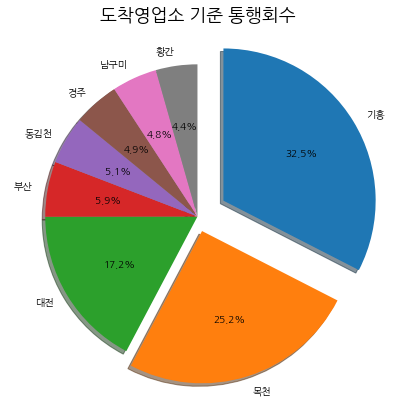

In [25]:
# Configure figure size
plt.figure(figsize=(7,7))
# Creae pie Chart
plt.pie(values, explode=explode, labels=labels, startangle = 90, shadow=True, autopct='%.1f%%', counterclock=False)
# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
# Show plot
plt.show()